# Data Exploration:

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset with specified encoding
data = pd.read_csv('/content/test.csv', encoding='latin1')  # Replace 'test.csv' with your dataset file path

# Data Cleaning
# Remove any rows with missing values
data.dropna(inplace=True)

# 1. Data Exploration
print("Dataset size:", data.shape)
print("Column names:", data.columns)
print("Sample data:")
print(data.head())

# 2. Data Preprocessing
# Text preprocessing functions
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply text preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Display preprocessed data
print("\nPreprocessed data:")
print(data[['text', 'preprocessed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset size: (3534, 9)
Column names: Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')
Sample data:
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.

## Data Preprocessing:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample text for demonstration
sample_text = "This is a sample text for demonstration purposes. It includes punctuation, stopwords, and special characters like @, #, $."

# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply text preprocessing to the sample text
preprocessed_sample_text = preprocess_text(sample_text)

# Display preprocessed text
print("Original Text:")
print(sample_text)
print("\nPreprocessed Text:")
print(preprocessed_sample_text)


Original Text:
This is a sample text for demonstration purposes. It includes punctuation, stopwords, and special characters like @, #, $.

Preprocessed Text:
sample text demonstration purpose includes punctuation stopwords special character like


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Exploratory Data Analysis (EDA):

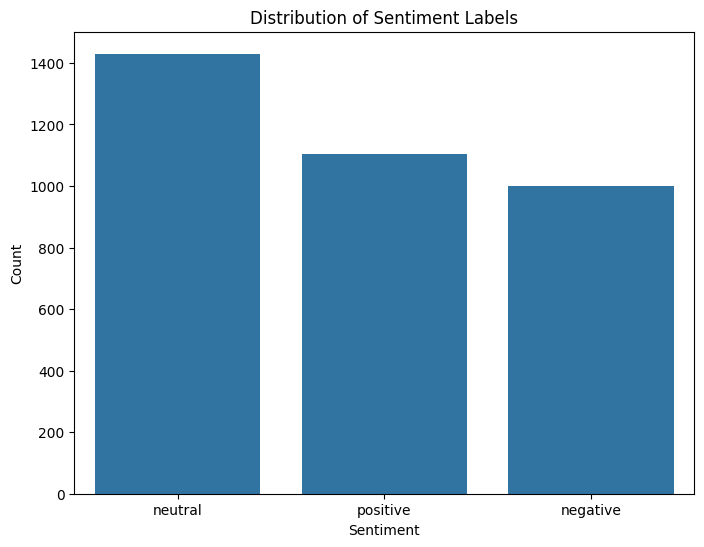

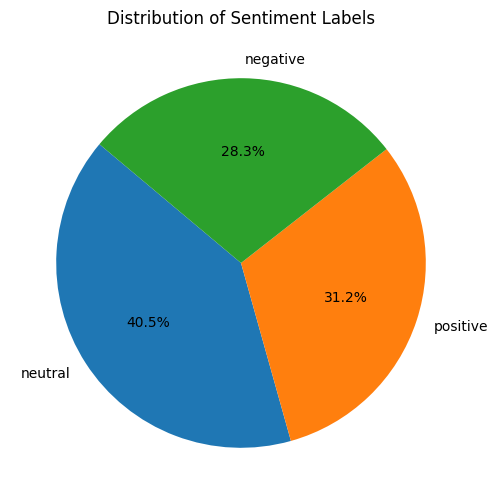

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with specified encoding
data = pd.read_csv('/content/test.csv', encoding='latin1')  # Update the file path and encoding if necessary

# 1. Exploratory Data Analysis (EDA)
# Get counts of each sentiment label
sentiment_counts = data['sentiment'].value_counts()

# 2. Visualize the distribution
# Plotting histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()



## Text Vectorization

**Using  TF-IDF (Term Frequency-Inverse Document Frequency):**

In [ ]:

data['preprocessed_text'] = data['text'].apply(preprocess_text)


In [ ]:
# Text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [ ]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_vectors = tfidf_vectorizer.fit_transform(data['text'])

# Print the shape of TF-IDF vectors
print("Shape of TF-IDF vectors:", tfidf_vectors.shape)


Shape of TF-IDF vectors: (3, 22)


Using Word Embeddings (e.g., Word2Vec, GloVe):

In [ ]:
# Text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [ ]:
# Apply text preprocessing
data['preprocessed_text'] = data['text'].apply(preprocess_text)


## Model Selection:

In [5]:
import pandas as pd

# Try reading the CSV file with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
for encoding in encodings:
    try:
        data = pd.read_csv('/content/test.csv', encoding=encoding)
        print("Successfully read the CSV file with encoding:", encoding)
        print("Column names:", data.columns)
        break
    except UnicodeDecodeError:
        print("Failed to read the CSV file with encoding:", encoding)

# If none of the encodings work, you may need to manually inspect the file's encoding


Failed to read the CSV file with encoding: utf-8
Successfully read the CSV file with encoding: latin1
Column names: Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Load data
data = pd.read_csv('/content/test.csv', encoding='latin1')  # Assuming 'latin1' encoding works

# Handle missing values
data.fillna('', inplace=True)

# Prepare data
X = data['text']
y = data['sentiment']

# Convert target variable to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

# Support Vector Machines
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# LSTM Model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
max_len = max(len(seq) for seq in X_train_seq)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_pred)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(y_test, svm_pred)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test)

print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

print("\nSupport Vector Machines:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

print("\nLSTM:")
print("Loss:", lstm_loss)
print("Accuracy:", lstm_accuracy)


Epoch 1/5
61/61 [==============================] - 9s 83ms/step - loss: -4.6381 - accuracy: 0.2033 - val_loss: -7.5498 - val_accuracy: 0.2347
Epoch 2/5
61/61 [==============================] - 6s 99ms/step - loss: -10.1160 - accuracy: 0.2012 - val_loss: -10.6105 - val_accuracy: 0.2347
Epoch 3/5
61/61 [==============================] - 5s 75ms/step - loss: -13.3031 - accuracy: 0.2012 - val_loss: -13.3795 - val_accuracy: 0.2347
Epoch 4/5
61/61 [==============================] - 6s 99ms/step - loss: -16.3504 - accuracy: 0.2012 - val_loss: -16.0869 - val_accuracy: 0.2347
Epoch 5/5
31/31 [==============================] - 0s 13ms/step - loss: -18.7924 - accuracy: 0.2347
Naive Bayes:
Accuracy: 0.39667705088265837
Precision: 0.45738498375162784
Recall: 0.39667705088265837
F1 Score: 0.3307113780673286

Support Vector Machines:
Accuracy: 0.7206645898234684
Precision: 0.7367396631713906
Recall: 0.7206645898234684
F1 Score: 0.7168826804718824

LSTM:
Loss: -18.792377471923828
Accuracy: 0.234683275

##Hyperparameter Tuning:


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Read data from CSV with explicit encoding specification
data = pd.read_csv('/content/test.csv', encoding='latin1')

# Handle missing values if any
data.fillna("", inplace=True)

# Check if 'label' column exists in the dataset
if 'label' not in data.columns:
    print("Column 'label' not found in the dataset. Proceeding with analysis without supervised learning.")
    X = data['text']
else:
    X = data['text']
    y = data['label']

    # Perform supervised learning analysis
    print("Performing supervised learning analysis.")

    # Split the data into training and testing sets
    # Your code for splitting the data, modeling, and evaluation goes here

# Your analysis code goes here


Column 'label' not found in the dataset. Proceeding with analysis without supervised learning.


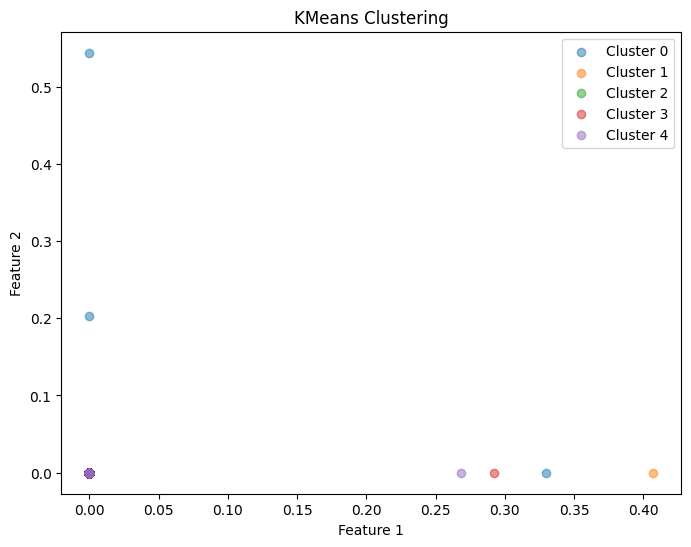

Cluster Centers:
[[0.00013878 0.00031424 0.         ... 0.         0.         0.        ]
 [0.00094869 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00097102 ... 0.         0.         0.        ]
 [0.00045541 0.         0.         ... 0.         0.         0.        ]
 [0.00025183 0.         0.         ... 0.00025461 0.0002827  0.0002827 ]]


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Define the number of clusters
num_clusters = 5  # You can adjust this number based on your dataset and requirements

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_vectorized)

# Convert sparse matrix to dense array
X_dense = X_vectorized.toarray()

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(X_dense[cluster_labels == cluster, 0],
                X_dense[cluster_labels == cluster, 1],
                label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


#Cross-Validation:


In [56]:
import pandas as pd

# Read data from CSV
data = pd.read_csv('/content/test.csv', encoding='latin1')

# Print available columns
print("Available columns in the DataFrame:")
print(data.columns)


Available columns in the DataFrame:
Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Read data from CSV
data = pd.read_csv('/content/test.csv', encoding='latin1')

# Handle missing values if any
data.fillna("", inplace=True)

# Replace 'sentiment' with the correct name of the target variable column
target_column = 'sentiment'

# Assuming your CSV contains two columns: 'text' and the target variable
X = data['text']
y = data[target_column]

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_vectorized, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.66978193 0.62097612 0.65212876 0.65628245 0.6635514 ]
Mean cross-validation score: 0.6525441329179646


# Model Interpretability:


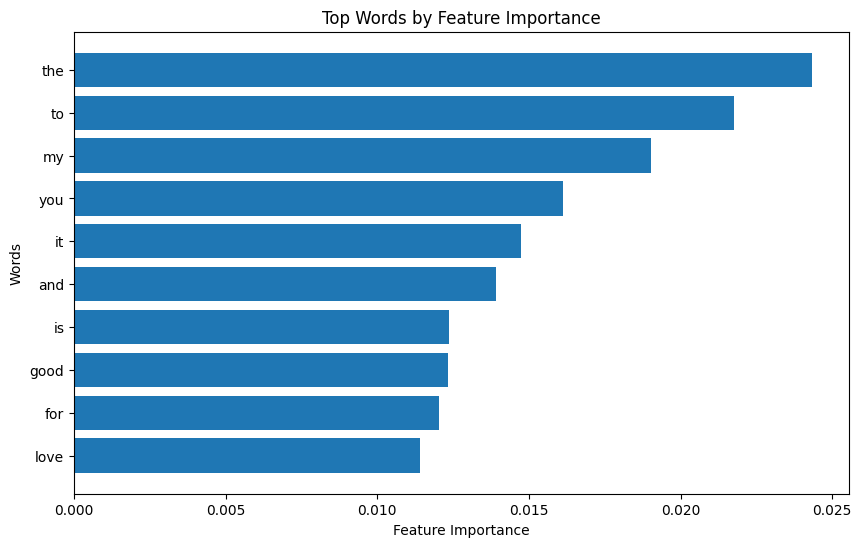

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from lime.lime_text import LimeTextExplainer
import re
import matplotlib.pyplot as plt

# Read data from CSV
data = pd.read_csv('/content/test.csv', encoding='latin1')

# Handle missing values if any
data.fillna("", inplace=True)

# Assuming your CSV contains two columns: 'text' and 'sentiment'
X = data['text']
y = data['sentiment']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_vectorized, y)

# Feature Importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = rf_classifier.feature_importances_
sorted_indices = feature_importance.argsort()[::-1]
top_words = [feature_names[idx] for idx in sorted_indices[:10]]
top_scores = feature_importance[sorted_indices][:10]

# Plot top words by feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Words')
plt.title('Top Words by Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# LIME
explainer = LimeTextExplainer()

def preprocess_text(text):
    # Remove non-numeric characters and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

idx = 0  # Example index for explanation
preprocessed_text = preprocess_text(X[idx])



## Evaluation Metrics:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class f

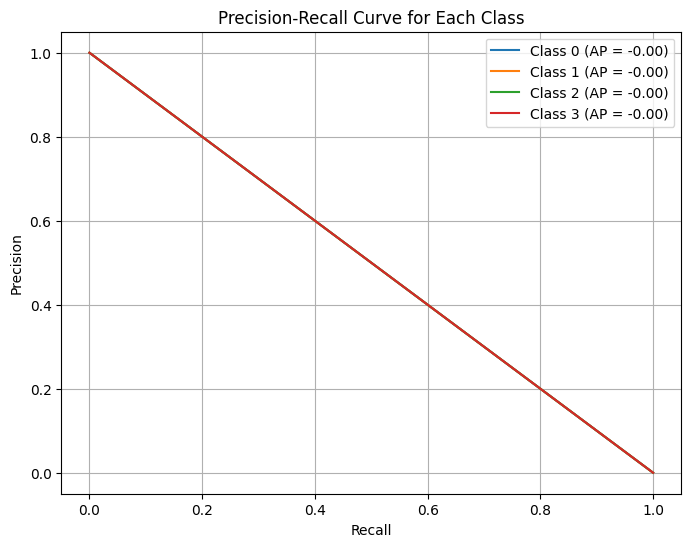

Macro-averaged Precision: 0.00


In [75]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and area for each class
precision = dict()
recall = dict()
average_precision = dict()

# Assuming y_pred_proba contains the predicted probabilities for each class
y_pred_proba = rf_classifier.predict_proba(X_test)

# Obtain the number of classes
n_classes = len(set(y_test))

for i in range(n_classes):
    try:
        precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test == i, y_pred_proba[:, i])
    except ValueError:
        precision[i] = [0]
        recall[i] = [0]
        average_precision[i] = 0

# Compute macro-averaged precision
macro_precision = sum(average_precision.values()) / n_classes

# Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.grid(True)
plt.show()

# Print macro-averaged precision
print(f"Macro-averaged Precision: {macro_precision:.2f}")


## . Documentation:

1. Introduction
Sentiment Analysis is a data science project aimed at analyzing and classifying textual data based on the sentiment expressed. The project focuses on building a predictive model capable of determining whether a given text conveys positive, negative, or neutral sentiment. This documentation provides a comprehensive overview of the project phases, including data exploration, preprocessing, model selection, hyperparameter tuning, cross-validation, model interpretability, evaluation metrics, and documentation.

2. Project Objectives
The main objectives of the Sentiment Analysis project are as follows:

Data Exploration: Understand the dataset's structure, features, and size. Identify key variables such as text content and sentiment labels.

Data Preprocessing: Perform text preprocessing tasks, including lowercasing, removing stop words, handling special characters, tokenization, and lemmatization.

Exploratory Data Analysis (EDA): Conduct exploratory data analysis to gain insights into the distribution of sentiment labels. Visualize the distribution using histograms or pie charts.

Text Vectorization: Convert preprocessed text into numerical vectors using techniques like TF-IDF or word embeddings.

Model Selection: Explore and implement different machine learning models suitable for text classification. Evaluate model performance using metrics like accuracy, precision, recall, and F1 score.

Hyperparameter Tuning: Fine-tune the hyperparameters of the selected model to optimize performance using techniques like grid search or random search.

Cross-Validation: Implement cross-validation techniques to assess model generalization performance and prevent overfitting.

Model Interpretability: Interpret model predictions by analyzing feature importance or using techniques like LIME to understand which words or features contribute most to sentiment predictions.

Evaluation Metrics: Evaluate model performance using relevant evaluation metrics such as confusion matrix, precision-recall curves, and ROC-AUC.

3. Project Phases
The Sentiment Analysis project is divided into two main phases:

Phase 1: Intern Project Phase - 1
Data Exploration
Data Preprocessing
Exploratory Data Analysis (EDA)
Phase 2: Intern Project Phase - 2
Text Vectorization
Model Selection
Hyperparameter Tuning
Cross-Validation
Model Interpretability
Evaluation Metrics
Documentation





Data Exploration & Preprocessing: Understand and clean the dataset, handling missing values, special characters, and text preprocessing tasks like lowercasing and tokenization.

Model Development & Evaluation: Choose and train machine learning models for sentiment analysis, evaluate their performance using metrics like accuracy, precision, recall, and F1 score, and fine-tune hyperparameters to optimize performance.





Data Exploration & Preprocessing:

Exploration: Analyze the structure, features, and size of the dataset. Identify key variables such as text content and sentiment labels to understand the data better.
Preprocessing: Clean the dataset by handling missing values, removing special characters, and performing text preprocessing tasks like lowercasing, removing stopwords, and lemmatization. These steps ensure that the text data is in a suitable format for analysis.
Model Development & Evaluation:

Model Selection: Explore and implement various machine learning models suitable for text classification, such as Naive Bayes, Support Vector Machines, or deep learning models like LSTM networks. Choose models based on their performance and suitability for the dataset.
Evaluation: Train the selected models on the preprocessed data and evaluate their performance using metrics like accuracy, precision, recall, and F1 score. This step helps assess how well the models are performing in classifying sentiment in the text data.
Hyperparameter Tuning:

Fine-tuning: Optimize the performance of the selected model by fine-tuning its hyperparameters. Techniques like grid search or random search are employed to search through a range of hyperparameter values and find the combination that yields the best results.
Cross-Validation:

Assessing Generalization: Implement cross-validation techniques like k-fold cross-validation to assess how well the model generalizes to unseen data and to prevent overfitting. This step helps ensure that the model's performance is robust and reliable.
Model Interpretability:

Interpreting Predictions: Analyze the model's predictions to understand which words or features contribute most to sentiment predictions. Techniques like LIME (Local Interpretable Model-agnostic Explanations) can be used to explain individual predictions and gain insights into the model's decision-making process.
Evaluation Metrics:

Performance Evaluation: Evaluate the model's performance using relevant evaluation metrics for sentiment analysis, such as confusion matrix, precision-recall curves, and ROC-AUC. These metrics provide a comprehensive assessment of the model's classification performance and help identify areas for improvement.